## Introduction

My research question is: Does football and closeness centrality affect location of coffee shops in University College London (UCL) neighborhood? I used OSMnx street network data to get the closeness and betweeness centrality and all the coffee shops location. After this, visualise them to see if there is a relationship between the coffee shop locations and critical streets location.

In [1]:
# imports the various library for the lab
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import osmnx as ox # this line imports osmnx
import networkx as nx # this line imports networkx
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
place = ' University College London'

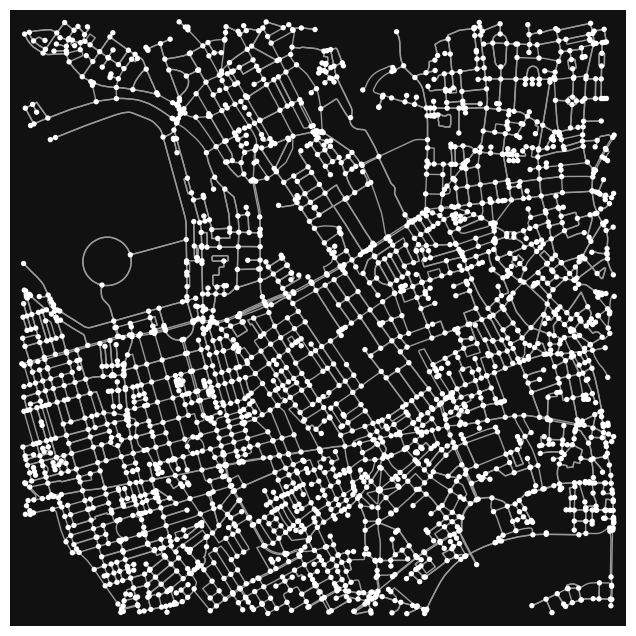

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
G=ox.graph_from_address(place, dist=2000, network_type='drive')
ox.plot_graph(G)

In [4]:
# plot the buildings for specific city from OSM: get geometry
tags= tags={'amenity': True, 'highway':True, 'landuse':True, 'building':True, 'waterway': True, 'railway': True}
all_geom=ox.geometries.geometries_from_address('Camden town,London', tags, dist=2000)
all_geom = all_geom.to_crs(epsg=3857)

/var/folders/8s/_0n45l5n37v6x1vkm6r4tbbc0000gn/T/ipykernel_24828/173296394.py:3: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  all_geom=ox.geometries.geometries_from_address('Camden town,London', tags, dist=2000)


In [5]:
# the nodelist for the street network graph
G.nodes(data=True)

NodeDataView({78112: {'y': 51.526976, 'x': -0.1457924, 'street_count': 3}, 99936: {'y': 51.5236106, 'x': -0.1527906, 'street_count': 3}, 99937: {'y': 51.5230177, 'x': -0.1520235, 'street_count': 3}, 101818: {'y': 51.5351816, 'x': -0.148105, 'street_count': 3}, 101831: {'y': 51.5356116, 'x': -0.1470438, 'street_count': 3}, 101839: {'y': 51.5375137, 'x': -0.1526548, 'street_count': 3}, 101982: {'y': 51.5228787, 'x': -0.1462595, 'street_count': 3}, 101986: {'y': 51.5222839, 'x': -0.144392, 'street_count': 4}, 101990: {'y': 51.5205731, 'x': -0.1477006, 'street_count': 4}, 101991: {'y': 51.5216534, 'x': -0.1481922, 'street_count': 4}, 101992: {'y': 51.5213948, 'x': -0.1496954, 'street_count': 4}, 101993: {'y': 51.5203158, 'x': -0.1492251, 'street_count': 4}, 101995: {'y': 51.5199741, 'x': -0.1517856, 'street_count': 3}, 101997: {'y': 51.5190928, 'x': -0.1486525, 'street_count': 4}, 101998: {'y': 51.5193478, 'x': -0.147143, 'street_count': 4}, 101999: {'y': 51.5197389, 'x': -0.144899, 'stree

In [6]:
# the corresponding edgelist from the same graph
G.edges()#data=True

OutMultiEdgeDataView([(78112, 25508583), (78112, 25508584), (78112, 25508584), (99936, 2146383887), (99936, 4544836433), (99937, 25470798), (99937, 200047), (101818, 9221415718), (101818, 101831), (101818, 4544836447), (101831, 101818), (101831, 9443627313), (101831, 905115460), (101839, 56472509), (101839, 1427461955), (101982, 1611082208), (101982, 34708773), (101986, 1685938653), (101986, 25495406), (101986, 821559), (101986, 1611082205), (101990, 330803151), (101990, 101998), (101991, 101992), (101991, 101990), (101991, 1514726033), (101992, 101991), (101992, 1667118232), (101992, 1619316122), (101993, 101992), (101993, 101990), (101995, 1619500464), (101995, 1619464655), (101995, 5560599870), (101997, 101993), (101997, 21651810), (101998, 108229), (101998, 101997), (101999, 1611082164), (101999, 1685938634), (102000, 311422343), (102000, 105511), (102003, 1619500464), (102003, 1619527499), (102005, 25495450), (102005, 107343), (102005, 311422343), (102010, 1666324195), (102010, 16

In [7]:
# export it back to a dataframe with NetworkX
DFG=nx.to_pandas_edgelist(G).head()
DFG.head()

source      target  ref      osmid bridge width est_width service maxspeed  \
0   78112    25508583  NaN  129375498    NaN   NaN       NaN     NaN   20 mph   
1   78112    25508584  NaN  129375498    NaN   NaN       NaN     NaN   20 mph   
2   78112    25508584  NaN    4257258    NaN   NaN       NaN     NaN   20 mph   
3   99936  2146383887  NaN  204647020    NaN   NaN       NaN     NaN   20 mph   
4   99936  4544836433  NaN  233623258    NaN   NaN       NaN     NaN   20 mph   

                name junction reversed  \
0       Outer Circle      NaN    False   
1       Outer Circle      NaN     True   
2  Cambridge Terrace      NaN    False   
3          York Gate      NaN    False   
4          York Gate      NaN    False   

                                            geometry   length lanes tunnel  \
0                                                NaN   19.391   NaN    NaN   
1                                                NaN   63.845   NaN    NaN   
2  LINESTRING (-0.1457924 51.526976, -0.1455099 5...  102.544   NaN    NaN   
3                                                NaN    8.052   NaN    NaN   
4  LINESTRING (-0.1527906 51.5236106, -0.1529425 ...   46.768   NaN    NaN   

   oneway      access       highway  
0   False  permissive  unclassified  
1   False  permissive  unclassified  
2    True  permissive   residential  
3   False  permissive  unclassified  
4    True  permissive  unclassified

In [8]:
# Convert the graph G to GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# Use the 'explore' method to create and display the map
Base_map = gdf_edges.explore(color='red')
Base_map

### Betweeness centrality

In [9]:
# convert to the digraph
DG = ox.get_digraph(G)
# edge betweeness centrality
edge_bc = nx.betweenness_centrality(nx.line_graph(DG))
# set or inscribe the betweeness measure of each node as an edge attribute of the graph network object
nx.set_edge_attributes(DG,edge_bc,'bc')
G1 = nx.MultiGraph(DG)

/var/folders/8s/_0n45l5n37v6x1vkm6r4tbbc0000gn/T/ipykernel_24828/4236467073.py:19: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  coffee_shops = ox.geometries_from_address(place, tags=tags, dist=2000)


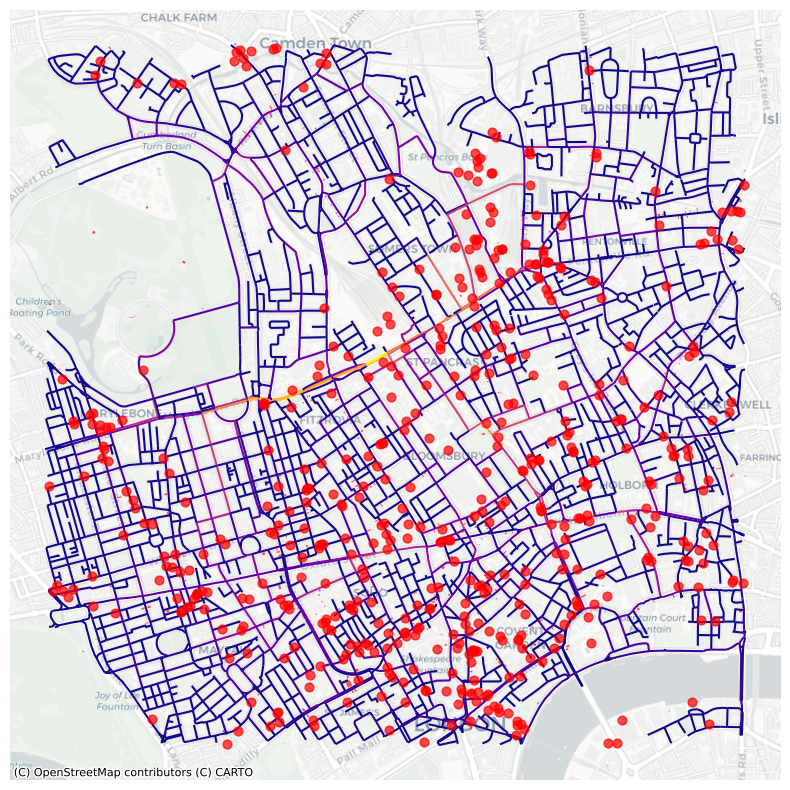

In [12]:
# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G1,nodes=False,fill_edge_geometry=True)

# set crs to 3857 (needed for contextily)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857

# plot edges according to betweeness centrality
ax=gdf_edges.plot('bc',cmap='plasma',figsize=(10,10))

# add a basemap using contextilly
import contextily as ctx
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')

# Plot the coffee shops
tags = {'amenity': 'cafe'}

# Get the coffee shops in the specified area
coffee_shops = ox.geometries_from_address(place, tags=tags, dist=2000)
coffee_shops = coffee_shops.to_crs(epsg=3857)

coffee_shops.plot(ax=ax, color='red', markersize=40, alpha=0.7, zorder=5)

plt.axis('off')
plt.show()

The higher betweenness centrality indicates a higher trafic flow, which could be used for identify the maximum football. In this graph, warmer color (yellow) means higher betweenness centrality, which might be passed through more frequently. From it, there is no clear relationship between the number of coffee shops and the most critical streets (yellow), but there are more coffee shops in red or orange areas than that in purple ones.

### Closeness centrality

In [18]:
# convert to the digraph
DG = ox.get_digraph(G)
# edge closeness centrality
edge_cc = nx.closeness_centrality(nx.line_graph(DG))
# set or inscribe the betweeness measure of each node as an edge attribute of the graph network object
nx.set_edge_attributes(DG,edge_cc,'cc')
G1 = nx.MultiGraph(DG)

/var/folders/8s/_0n45l5n37v6x1vkm6r4tbbc0000gn/T/ipykernel_24828/281872908.py:20: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  coffee_shops = ox.geometries_from_address(place, tags=tags, dist=2000)


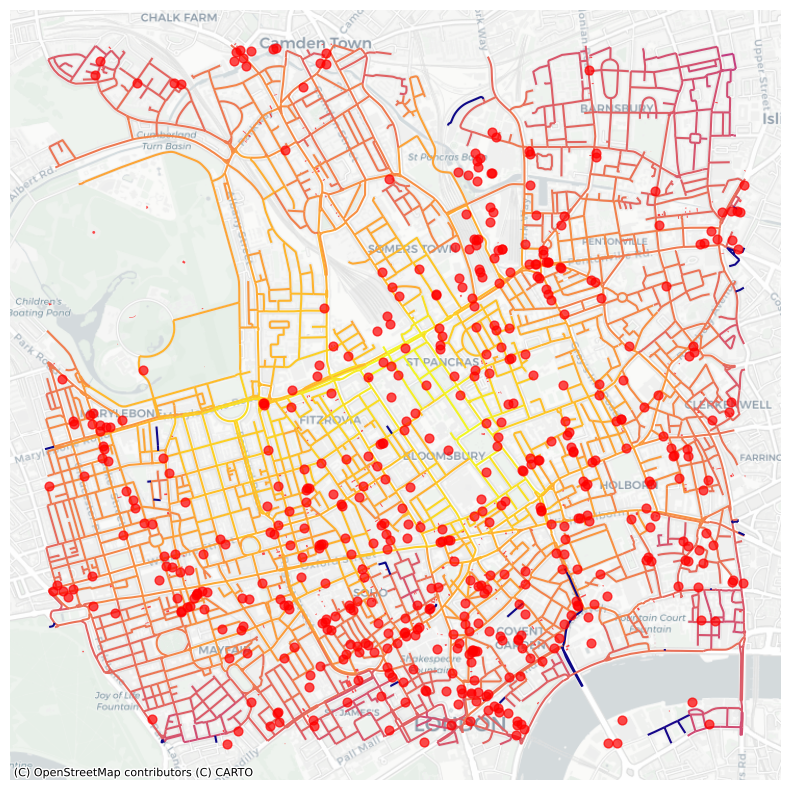

In [19]:
# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G1,nodes=False,fill_edge_geometry=True)

# set crs to 3857 (needed for contextily)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857

# plot edges according to betweeness centrality
ax=gdf_edges.plot('cc',cmap='plasma',figsize=(10,10))

# add a basemap using contextilly
import contextily as ctx
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')

# Plot the coffee shops
# coffee shop location
tags = {'amenity': 'cafe'}

# Get the coffee shops in the specified area
coffee_shops = ox.geometries_from_address(place, tags=tags, dist=2000)

coffee_shops = coffee_shops.to_crs(epsg=3857)

coffee_shops.plot(ax=ax, color='red', markersize=40, alpha=0.7, zorder=5)

# Hide the axis
plt.axis('off')
# Show the plot
plt.show()

The closeness centrality indicates how close a location is to all other locations in the road network. The warmer color (yellow) part in the graph are more close to every place in the area. The result shows that there is no clear relatiionship between the coffee shop location and the closeness centrality.

High cc and low bc areas,fitzrovia for example, are easily accessible but may not be on the most critical or central paths, so the coffee shops here might serve a local community with regular customers. The number of them may depend on the demand from the community.